In [1]:
import pandas as pd

In [3]:
df1=pd.read_excel('eda_payroll_dataset_batch2.xlsx')

In [7]:
print(df1.head(10))

  Employee_ID     Name   Department   Position  Base_Salary    Bonus  \
0       E0001    Grace           HR   Engineer          NaN  4163.33   
1       E0002    David           HR   Engineer     65764.33  9394.54   
2       E0003      Eva           HR   Engineer     38406.72  5648.91   
3       E0004    Grace    Marketing  Executive     69696.49  9426.69   
4       E0005  Charlie        Sales    Manager     47604.83  2594.60   
5       E0006   Hannah    Marketing    Analyst     46805.10  7394.40   
6       E0007      Eva        Sales      Clerk     38463.25  6363.87   
7       E0008      Eva    Marketing    Analyst     62100.39  7524.38   
8       E0009    Grace    Marketing    Analyst     98173.37  2539.34   
9       E0010      Bob  Engineering    Manager     54879.75  6817.45   

   Overtime_Hours  Overtime_Pay  Tax_Deductions  Net_Salary  
0            19.0       4380.96         4613.84    74583.16  
1            49.0       3613.92        11611.08    67161.71  
2            42.0    

In [9]:
print(df1.dtypes)

Employee_ID        object
Name               object
Department         object
Position           object
Base_Salary       float64
Bonus             float64
Overtime_Hours    float64
Overtime_Pay      float64
Tax_Deductions    float64
Net_Salary        float64
dtype: object


In [21]:
summary_stats=df1.describe()   #Calculate summary statistics (mean, median, mode, standard deviation, etc.) for numeric columns

In [23]:
mode=df1.mode().iloc[0]

In [25]:
print(summary_stats)

         Base_Salary        Bonus  Overtime_Hours  Overtime_Pay  \
count     799.000000   810.000000      896.000000    920.000000   
mean    78035.855594  5268.840037       24.863839   2500.626250   
std     36142.587414  2726.964633       14.059705   1428.004028   
min     30016.960000   512.790000        0.000000     10.380000   
25%     51702.205000  2907.430000       13.000000   1276.012500   
50%     77453.870000  5313.710000       24.000000   2522.685000   
75%     98615.635000  7623.840000       37.000000   3732.297500   
max    344143.560000  9977.420000       49.000000   4995.250000   

       Tax_Deductions     Net_Salary  
count      905.000000    1000.000000  
mean     15251.390055   67947.263400  
std       8402.407227   27890.284223  
min       1018.200000    4428.430000  
25%       7979.770000   45452.717500  
50%      15428.350000   68887.255000  
75%      22124.250000   90716.725000  
max      29995.630000  125430.250000  


In [19]:
print(mode)  #mode

Employee_ID           E0001
Name                  David
Department               HR
Position          Executive
Base_Salary        30016.96
Bonus                512.79
Overtime_Hours         44.0
Overtime_Pay        3334.68
Tax_Deductions       1018.2
Net_Salary          4428.43
Name: 0, dtype: object


In [39]:
miss_value=df1.isnull().sum()  # Identify columns with missing values

In [41]:
print(miss_value)

Employee_ID         0
Name                0
Department          0
Position            0
Base_Salary       201
Bonus             190
Overtime_Hours    104
Overtime_Pay       80
Tax_Deductions     95
Net_Salary          0
dtype: int64


In [43]:
tot_row=df1.shape[0]   # Calculate percentage of missing values in each column
miss_percentage=(miss_value/tot_row)*100

In [45]:
miss_percentage=miss_percentage[miss_percentage>0]

In [37]:
print(miss_percentage) # Filter columns with missing values

Base_Salary       20.1
Bonus             19.0
Overtime_Hours    10.4
Overtime_Pay       8.0
Tax_Deductions     9.5
dtype: float64


In [48]:
import matplotlib.pyplot as plt

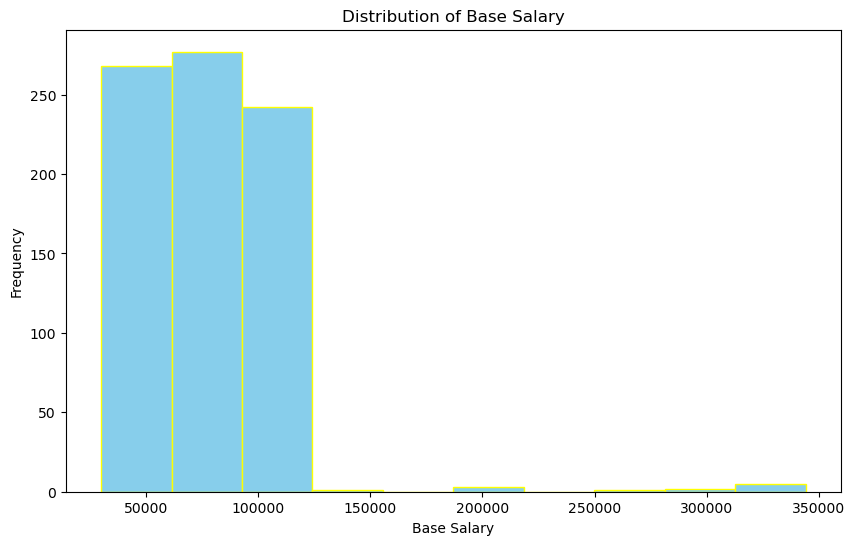

In [62]:
plt.figure(figsize=(10, 6))
df1['Base_Salary'].hist(bins=10, color='skyblue', edgecolor='yellow')
plt.title('Distribution of Base Salary')
plt.xlabel('Base Salary')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [64]:
import seaborn as sns

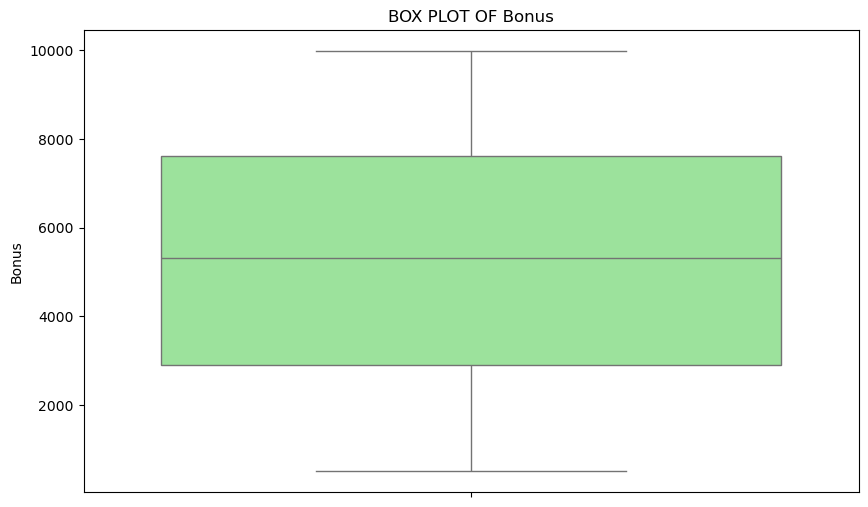

In [78]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='Bonus', data=df1, color='lightgreen')
plt.title('BOX PLOT OF Bonus')
plt.ylabel('Bonus')
plt.show()

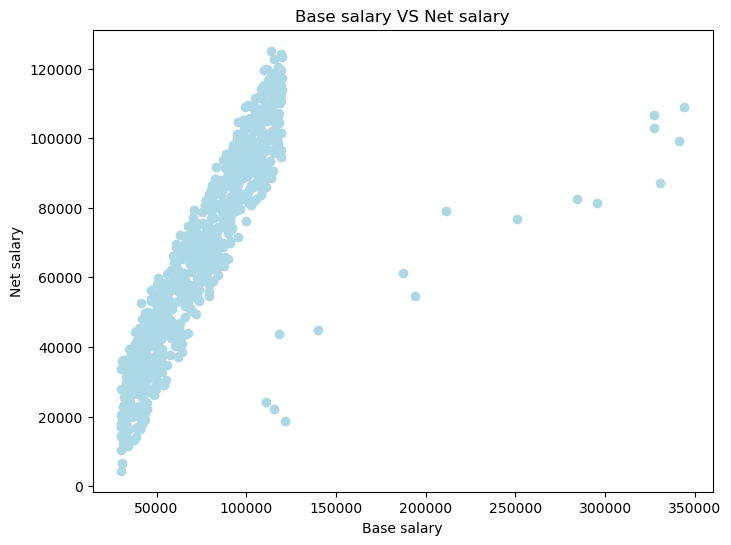

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Base_Salary'], df1['Net_Salary'], color='lightblue')
plt.title('Base salary VS Net salary')
plt.xlabel('Base salary')
plt.ylabel('Net salary')
plt.show()

In [100]:
numeric_df=df1.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()


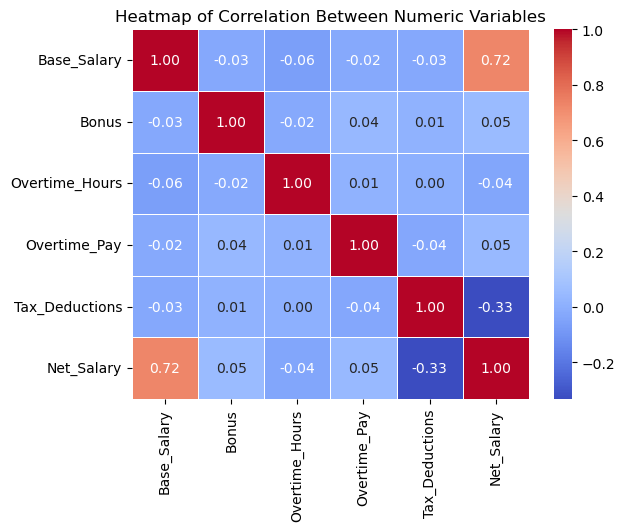

In [102]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5, fmt='.2f')
plt.title('Heatmap of Correlation Between Numeric Variables')
plt.show()

<Figure size 1000x1000 with 0 Axes>

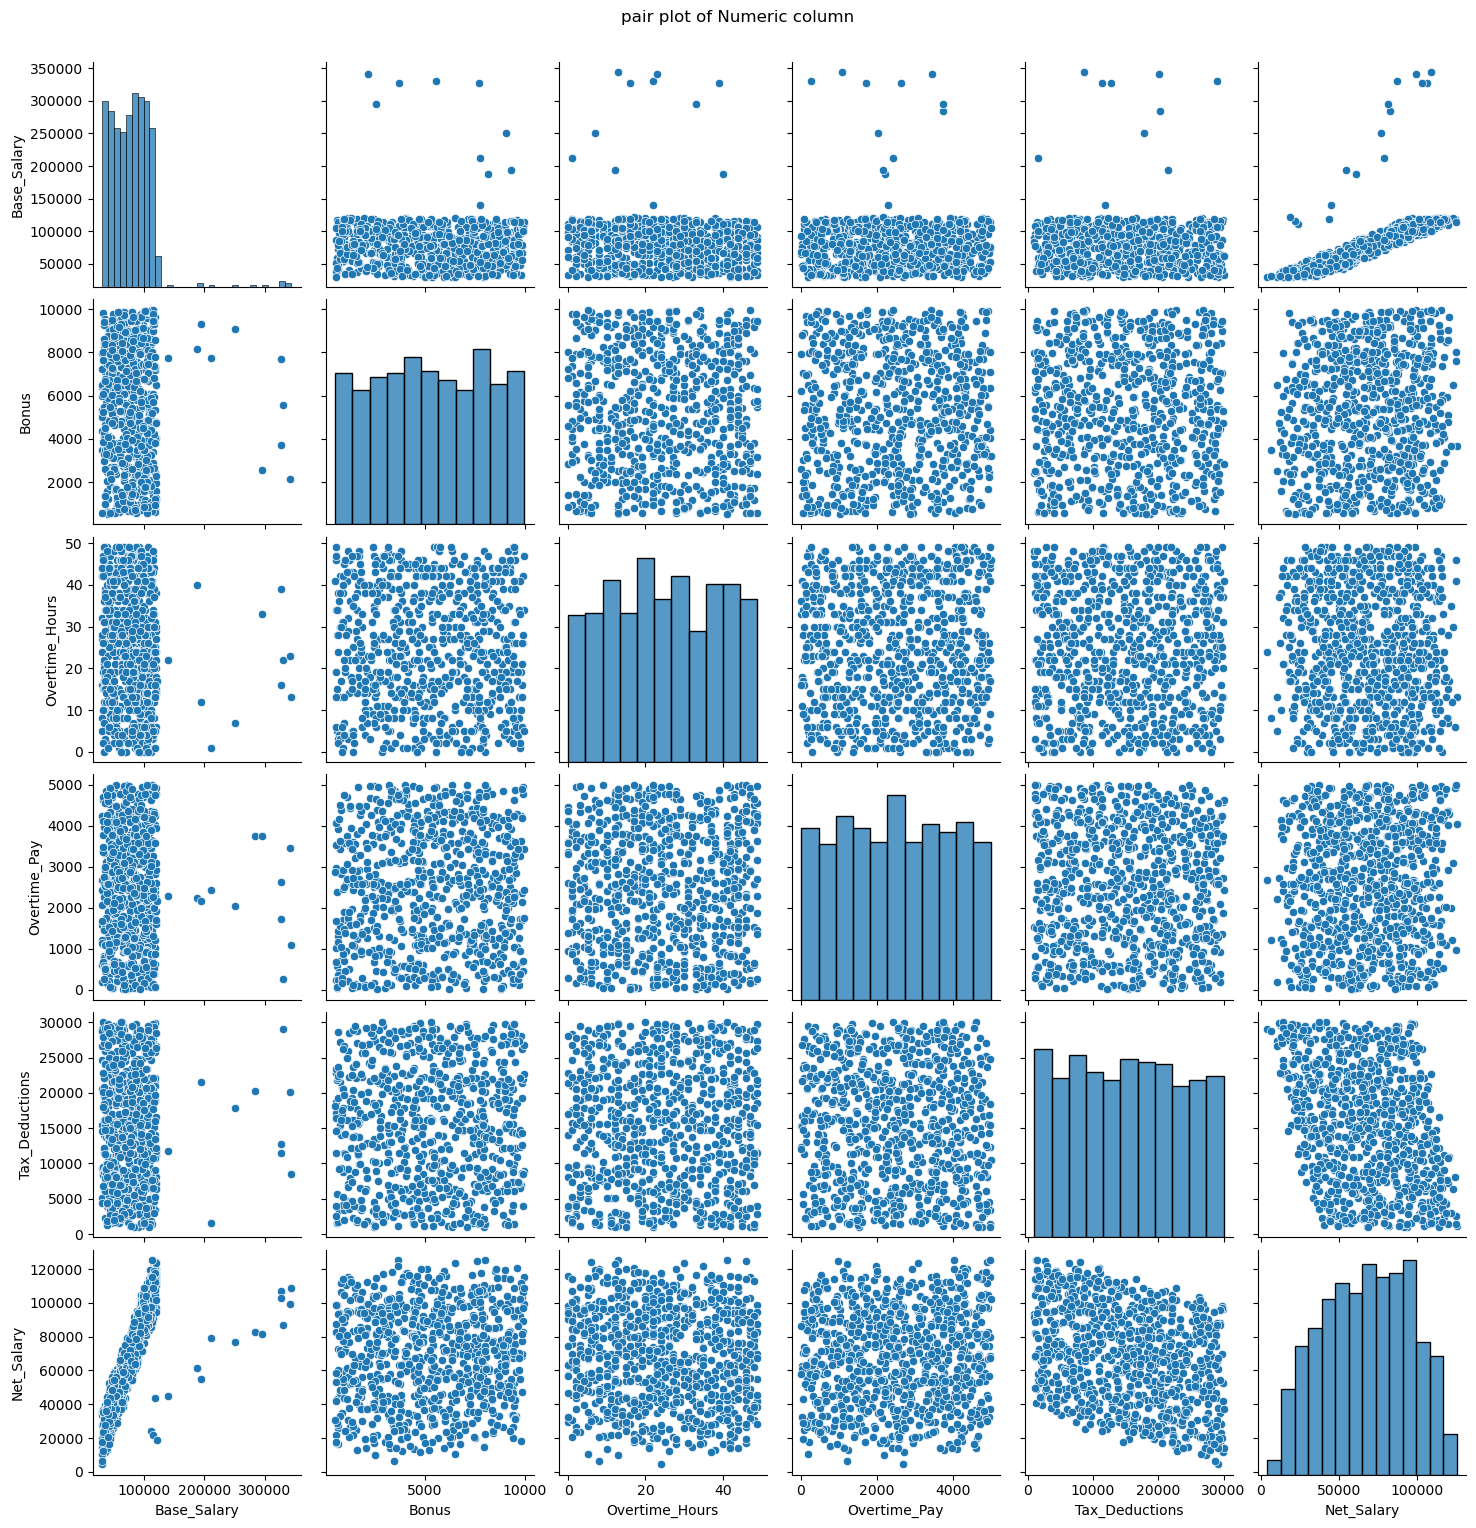

In [110]:
plt.figure(figsize=(10, 10))
sns.pairplot(df1.select_dtypes(include=['number']))
plt.suptitle('pair plot of Numeric column', y=1.02)
plt.show()

In [112]:
department_avg_salary = df1.groupby('Department')['Net_Salary'].mean().reset_index()

C:\Users\HDC0422089\AppData\Local\Temp\ipykernel_10120\3448554636.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Net_Salary', data=department_avg_salary, palette='viridis')


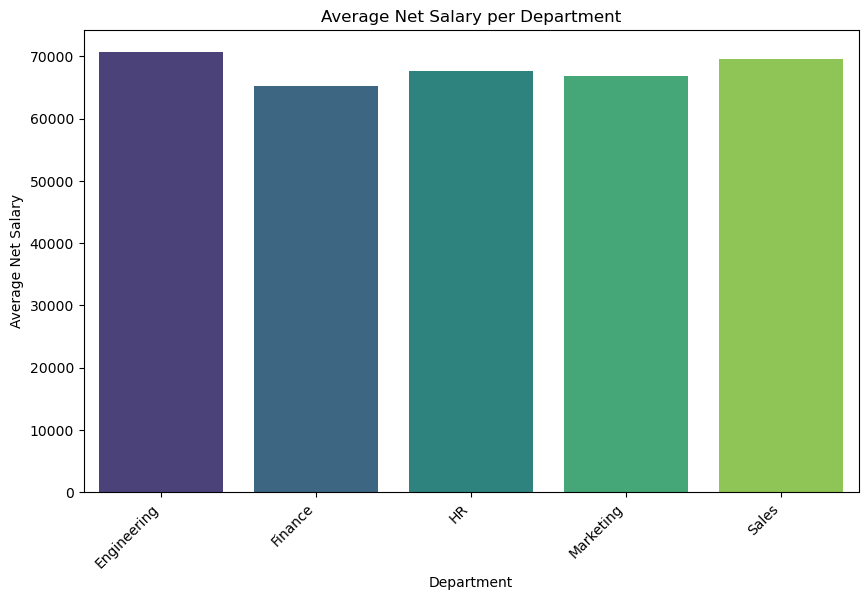

In [122]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Net_Salary', data=department_avg_salary, palette='viridis')
plt.title('Average Net Salary per Department')
plt.xlabel('Department')
plt.ylabel('Average Net Salary')
plt.xticks(rotation=45, ha='right')  
plt.show()

In [118]:
position_overtime = df1.groupby('Position')['Overtime_Hours'].sum().reset_index()

C:\Users\HDC0422089\AppData\Local\Temp\ipykernel_10120\4145646585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Position', y='Overtime_Hours', data=position_overtime, palette='coolwarm')


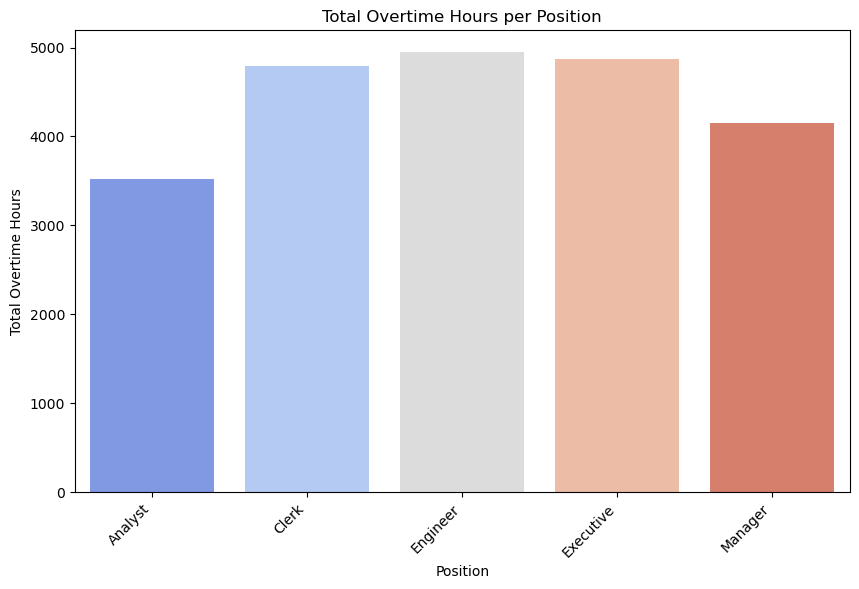

In [120]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Overtime_Hours', data=position_overtime, palette='coolwarm')
plt.title('Total Overtime Hours per Position')
plt.xlabel('Position')
plt.ylabel('Total Overtime Hours')
plt.xticks(rotation=45, ha='right')  
plt.show()